# Feature Engineering & buiding a Pipeline to predict Employee Churn #

1. Formulate the Prediction Question:

Prediction Question:

"How can we develop a data preprocessing pipeline to build a predictive model that determines the likelihood of an employee leaving the company based on various HR metrics?"

This question underscores the importance of creating a comprehensive data preprocessing pipeline as a crucial step in developing an effective predictive model

2. The HR Analytics dataset is downloaded from the Kaggle repository. This dataset includes 14,999 instances with 10  attributes.

3. Dataset Description and Variable Identification:
The dataset contains the following variables:

Independent Variables:
satisfaction_level (Independent, Interval): The level of satisfaction of each employee, on a scale from 0 to 1.
last_evaluation (Independent, Interval): Last evaluation score, on a scale from 0 to 1.
number_project (Independent, Interval): Number of projects assigned to the employee.
average_monthly_hours (Independent, Interval): Average number of hours worked per month.
time_spend_company (Independent, Interval): Number of years the employee has spent at the company.
Work_accident (Independent, Nominal): Indicates if the employee had a work accident (1 for yes, 0 for no).
promotion_last_5years (Independent, Nominal): Indicates if the employee was promoted in the last five years (1 for yes, 0 for no).
Department (Independent, Nominal): The department in which the employee works.
salary (Independent, Ordinal): The level of salary (low, medium, high).

Dependent Variable:
left (Dependent, Nominal): Indicates if the employee left the company (1 for yes, 0 for no).

Data Preprocessing
Handling Missing Values: The dataset has no missing values.
Encoding Categorical Variables: One-hot encoding is used for 'Department', and ordinal encoding for 'salary'.
Scaling Numerical Variables: StandardScaler is applied to scale numerical variables.
Model Building
Two models were used for prediction: RandomForestRegressor and LogisticRegression.
Validating the model using the cross validation and accuracy score and for logistic regression roc-auc curve.


## 4.Import Libraries and Load Dataset ##

In [1]:
# Importing necessary libraries for data analysis and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
df = pd.read_csv ('HR_comma_sep.csv')

print(df.head())




   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.shape

(14999, 10)

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## 5.Feature Engineering ##
We will apply various feature-engineering techniques, such as  categorical variable encoding, handling outliers, discretization, and variable transformation, using the feature-engine transformers available in the scikit-learn library.

Categorical Variable Encoding
Since the dataset contains nominal categorical variables (Department and salary) and the dependent variable is binary, we need to encode these variables. For Department, we'll use one-hot encoding, and for salary, which is an ordinal variable, we'll use ordinal encoding.

Handling Outliers
Outlier handling might be necessary for variables like average_monthly_hours and satisfaction_level. However, without further domain knowledge or specific instructions, we should be cautious about altering these values as they might represent valid, albeit extreme, cases.

Discretization and Variable Transformation
Discretization is not particularly applicable here as most of our independent variables are already in appropriate formats for regression analysis. Variable transformation will be applied to scale the data, especially for numerical variables like average_monthly_hours, satisfaction_level, and others, using standard scaling.

Data imputation
Imputation is not applicable here, since we don't have a missing values.

In [5]:
# Encoding categorical variables and scaling numerical variables
categorical_features = ['Department', 'salary']
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                      'average_montly_hours', 'time_spend_company', 'Work_accident', 
                      'promotion_last_5years']

Creating Pipeline
A pipeline will be created that includes:

Encoding categorical variables.
Scaling numerical variables.
A regression model, such as a RandomForestRegressor.

In [6]:
# Creating transformers for the pipeline
categorical_transformer = OneHotEncoder(drop='first')
numerical_transformer = StandardScaler()

In [7]:
# Column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

## 6. Splitting data ##

In [8]:
# Splitting the dataset into training and testing sets
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7&8. Creating the pipeline ##

In [9]:
#Creating the pipeline
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

## 9.Fitting the model ##

In [24]:
# Fit the pipeline on the training dataset
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Department', 'salary'])])),
                ('model', RandomForestRegressor(random_state=42))])

## 10. Evaluating the model ##

In [11]:
# Evaluating the model's performance using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-cv_scores)
r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

print("RMSE scores:", rmse)
print("R2 scores:", r2_scores)


RMSE scores: [0.11258959 0.1093614  0.12024524 0.10611688 0.10239911]
R2 scores: [0.92931339 0.93347286 0.92262722 0.93804188 0.94204519]


RMSE (Root Mean Squared Error):
The RMSE values range from approximately 0.102 to 0.120 across the different folds of cross-validation.
RMSE measures the average magnitude of the error between the predicted values from the model and the actual values in the dataset.
Since the RMSE values are low (close to 0), this indicates that the model's predictions are generally close to the actual values. The consistency of the RMSE scores across the folds suggests that the model is stable and generalizes well across different subsets of the dataset.

R^2 (Coefficient of Determination):
The R^2 scores vary from about 0.922 to 0.942.
R^2 is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
The closer the R^2 value is to 1, the better the model explains the variance of the target variable.
R^2 values are quite high, suggesting that the RandomForestRegressor does an excellent job of capturing the variance in the target variable. The model appears to be highly predictive.
Conclusion
The RandomForestRegressor model shows high predictive power with the given dataset, as evidenced by high R^2 values across all cross-validation folds.
The low RMSE values across the folds also indicate good model accuracy with small errors in predictions.
The consistency of the scores across different folds suggests that the model is stable and not sensitive to the particular splits of the data, which is a good indication of its robustness and generalizability.

In [12]:
train_score = pipeline.score(X_train, y_train)
print('R2 score on the training set:', np.round(train_score, 5))

test_score = pipeline.score(X_test, y_test)
print('R2 score on the test set:', np.round(test_score, 5))

R2 score on the training set: 0.99167
R2 score on the test set: 0.92288


Training Set (R2 score: 0.99167)

Explanation: An R2 score of 0.99167 on the training set indicates that the model explains approximately 99.17% of the variance in the target variable (whether an employee left the company) using the features in the training data.
This high R2 score suggests that the model fits the training data extremely well. It captures nearly all the variability in the data, which is generally a positive sign of the model's performance on the training data.

Test Set (R2 score: 0.92288)

Explanation: An R2 score of 0.92288 on the test set indicates that the model explains approximately 92.29% of the variance in the target variable using the features in the test data.
This high R2 score on the test set demonstrates that the model also generalizes well to unseen data. It suggests that the model retains strong predictive power and reliability when applied to new, out-of-sample data.

Overall Interpretation:
The model has a very high R2 score on both the training and test sets, indicating excellent performance. It effectively captures the relationship between the HR metrics and the likelihood of an employee leaving the company.



In [26]:

y_pred = pipeline.predict(X_test)


In [13]:

y_pred = pipeline.predict(X_test.iloc[[5]])
print(y_pred[0])


0.0


In [14]:
print(y_test.iloc[5])

0


## Building pipeline using Logistic regression ##

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Replacing the RandomForestRegressor with LogisticRegression in the pipeline
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', logistic_model)])

# Fit the logistic regression pipeline on the training dataset
logistic_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Department', 'salary'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

### Evaluating the model #

In [17]:
train_score =logistic_pipeline.score(X_train, y_train)
print('R2 score on the training set:', np.round(train_score, 5))

test_score = logistic_pipeline.score(X_test, y_test)
print('R2 score on the test set:', np.round(test_score, 5))

R2 score on the training set: 0.7909
R2 score on the test set: 0.784


In [18]:
# Predicting on the test set
y_pred = logistic_pipeline.predict(X_test)

# Calculating classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


accuracy, precision, recall, f1

(0.784, 0.5700483091787439, 0.3342776203966006, 0.42142857142857143)

Accuracy (0.784): This is the proportion of the total number of predictions that were correct. It combines both true positives and true negatives in the dataset. An accuracy of 0.784 means that approximately 78.4% of the model's predictions are correct. While accuracy is a useful measure, it may not give the best picture if the class distributions are imbalanced.
Precision (0.570): Precision measures the proportion of positive identifications that were actually correct. A precision of 0.570 means that when the model predicts an employee will leave, it is correct about 57.0% of the time. This is particularly important if the cost of a false positive is high.
Recall (0.334): Also known as sensitivity or the true positive rate, recall measures the proportion of actual positives that were identified correctly. A recall of 0.334 means that the model correctly identifies 33.4% of employees who actually left. This indicates that the model is quite conservative in predicting the positive class (employees leaving).
F1 Score (0.421): The F1 score is the harmonic mean of precision and recall, and it is a measure of a test's accuracy. An F1 score of 0.421 suggests that the model has a moderate balance between precision and recall. This is a useful metric when you need to balance precision and recall, which might be the case in scenarios where both false positives and false negatives are costly.

Interpretation:
Overall, the model performs reasonably well in terms of accuracy, suggesting that it can be a useful tool for predicting employee attrition. However, the relatively low recall indicates that many employees who actually left were not flagged by the model (i.e., a high number of false negatives). The precision indicates that when the model predicts an employee will leave, this prediction is correct more often than not, but there is still a notable proportion of false positives.

The moderate F1 score suggests that the model is not particularly strong in situations where you need to balance the importance of precision and recall, which can be common in business settings.

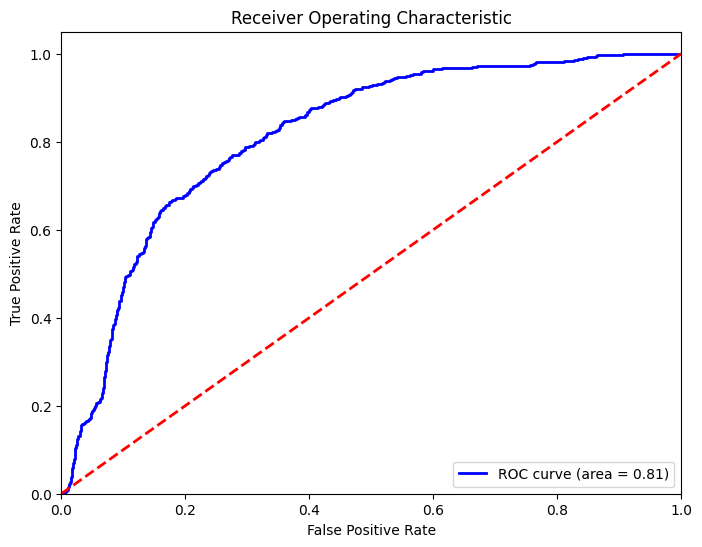

0.8148903038101614

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
y_pred_prob = logistic_pipeline.predict_proba(X_test)[:, 1]

# Calculate TPR and FPR for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

roc_auc

The Receiver Operating Characteristic (ROC) curve, which is a graphical plot used to show the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

Interpretation of the ROC curve:

The blue line represents the ROC curve of the classifier. It shows the trade-off between the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis at various threshold settings.
The True Positive Rate is also known as sensitivity, recall, or probability of detection in machine learning. It is calculated as TPR = TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.
The False Positive Rate is calculated as FPR = FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.
The red dashed line represents a completely random classifier (an 'uninformative' classifier), for which the true positive rate equals the false positive rate, no matter what the threshold is.
The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the two classes. In this case, the AUC is labeled as 0.81, which indicates that the model has a good level of distinguishability.
Ideally, the ROC curve will climb quickly toward the top-left corner of the plot, which indicates a high true positive rate and a low false positive rate.
The closer the ROC curve is to the top-left corner, the better the model's performance. If the ROC curve was closer to the red dashed line, it would indicate a less effective model.
In summary, the model with an AUC of 0.81 appears to perform much better than random chance (which would be the red dashed line with AUC = 0.5), indicating it has a good predictive ability.

In [20]:
train_score = logistic_pipeline.score(X_train, y_train)
print('R2 score on the training set:', np.round(train_score, 5))

test_score = logistic_pipeline.score(X_test, y_test)
print('R2 score on the test set:', np.round(test_score, 5))

R2 score on the training set: 0.7909
R2 score on the test set: 0.784


R^2 Score (Training: 0.7909, Test: 0.784):
The R^2 score, or coefficient of determination, explains how much variance in the dependent variable can be explained by the model. In classification contexts, this metric isn't typically as informative or relevant as it is for regression tasks.
An R^2 of 0.7909 for the training set and 0.784 for the test set suggests that the model is consistent across both datasets, which is a good sign of generalization. However, considering this is a classification problem, the R^2 score might not be the most appropriate metric to rely on.

In [21]:
from sklearn.metrics import mean_squared_error

# Predicting on the training and test sets
y_train_pred = logistic_pipeline.predict(X_train)
y_test_pred = logistic_pipeline.predict(X_test)

# Calculating RMSE for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE on the training set:', np.round(rmse_train, 5))

# Calculating RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE on the test set:', np.round(rmse_test, 5))


RMSE on the training set: 0.45728
RMSE on the test set: 0.46476


RMSE (Training: 0.45728, Test: 0.46476):
RMSE is the square root of the average of the squares of the errors. It's a measure of the average magnitude of the errors, giving you an idea of how much error there is in the model's predictions.
The RMSE values for both the training (0.45728) and test sets (0.46476) are fairly close, which suggests that the model is not overfitting. The model performs similarly on both unseen and seen data.
The values of RMSE should be considered relative to the scale of the dependent variable, 'left'. Since 'left' is a binary variable (0 or 1), an RMSE of around 0.46 can be considered moderate. It suggests that the model's predictions are, on average, about 0.46 away from the actual values when interpreted in the probabilistic sense (since logistic regression outputs probabilities).


In [22]:
# Predicting on the test set
y_pred_first_five = logistic_pipeline.predict(X_test.iloc[0:5])
print(y_pred_first_five[0:5])

[0 0 0 0 0]


In [23]:
print(y_test[0:5])

6723    0
6473    0
4679    0
862     1
7286    0
Name: left, dtype: int64


Analysis of findings:
Model Performance:

The RandomForestRegressor model shows excellent predictive power with high R2 scores and low RMSE.
The LogisticRegression model offers good classification metrics and a strong ROC AUC.

Insights:

High satisfaction level and last evaluation scores are likely critical indicators for predicting employee turnover.
Number of projects, average monthly hours, and time spent at the company also play significant roles.

Further improvements:

Further tuning and comparison of models could improve predictive performance.
Incorporating additional features or external data sources might provide deeper insights.
Overall, the analysis shows that both regression and classification approaches can be effectively used to predict employee turnover, each offering unique advantages in terms of model interpretability and performance.

Recording Link: https://vimeo.com/976641518/450d23b6ba?share=copy

References:

Kaggle. (2018). HR Analytics [Data set]. https://www.kaggle.com/datasets/giripujar/hr-analytics

